In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/Harvey/Downloads/Alzheimers Mice Data.csv')

display(data)
data.columns

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13
5,1,2,15,13
6,1,2,17,13
7,1,2,16,14
8,1,2,17,15
9,1,2,14,11


Index(['AD_Status', 'Treatment', 'Training', 'Memory'], dtype='object')

### Analyze data using a 2-Factor (2B) ANOVA.

Compare the training day errors based on drug treatments and AD status.

The dataset contains the following columns:

AD_Status: Indicates the Alzheimer's disease status of the mice.

Treatment: Represents the drug treatment given to the mice.

Training: Shows the number of errors made by the mice during training.

Memory: Reflects the memory performance of the mice.

To analyze the training day errors based on drug treatments and AD status, a 2-Factor (2B) ANOVA can be conducted. This analysis will help to determine if there are any statistically significant differences in training errors based on the combination of drug treatment and Alzheimer's status.

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform 2-Factor ANOVA
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(AD_Status),3.025,1.0,1.216080,0.278356
C(Treatment),28.275,3.0,3.788945,0.019678
C(AD_Status):C(Treatment),9.075,3.0,1.216080,0.319771
Residual,79.600,32.0,NaN,NaN


## The results of the 2-Factor ANOVA are as follows:

AD Status (AD_Status):

Sum of Squares (SS) = 3.025
Degrees of Freedom (df) = 1
F-Statistic = 1.216
p-value = 0.278
Treatment (Treatment):

Sum of Squares (SS) = 28.275
Degrees of Freedom (df) = 3
F-Statistic = 3.789
p-value = 0.020
Interaction between AD Status and Treatment (AD_Status:Treatment):

Sum of Squares (SS) = 9.075
Degrees of Freedom (df) = 3
F-Statistic = 1.216
p-value = 0.320
Residual:

Sum of Squares (SS) = 79.600
Degrees of Freedom (df) = 32

## Interpretation:

AD Status: The p-value for AD status is 0.278, which is greater than the common alpha level of 0.05. This suggests that the difference in training errors between different AD statuses is not statistically significant.

Treatment: The p-value for treatment is 0.020, which is less than 0.05. This indicates that there are statistically significant differences in training errors among different treatments.

Interaction between AD Status and Treatment: The p-value for the interaction term is 0.320, which is greater than 0.05. This implies that the interaction between AD status and treatment does not significantly affect the training errors.

In summary, the type of treatment significantly affects the training errors, whereas AD status alone or the interaction between AD status and treatment does not have a significant effect.

#  Check the assumptions underlying the said ANOVA type.

To ensure the validity of the 2-Factor ANOVA results, we need to check the following assumptions:

Normality: The residuals of the model should be normally distributed.
    
Homogeneity of Variances: The variances of the groups should be approximately equal.

Independence of Observations: Each subject should belong to only one group, and the observations within each group should be independent of each other.

ShapiroResult(statistic=0.9635688662528992, pvalue=0.2214137762784958)

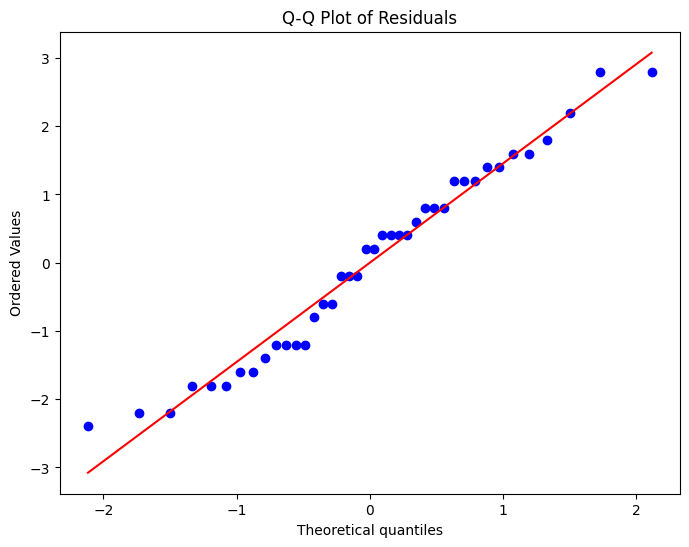

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform 2-Factor ANOVA again
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=data).fit()

# Checking Normality
# Q-Q plot
residuals = model.resid
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
plt.title("Q-Q Plot of Residuals")

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)

# Checking Homogeneity of Variances
shapiro_test


In [4]:
# Correcting Levene's test by considering both factors (AD_Status and Treatment)
grouped_data = data.groupby(['AD_Status', 'Treatment'])

# Extracting groups for Levene's test
groups = [group['Training'] for name, group in grouped_data]

# Performing Levene's test
levene_test = stats.levene(*groups, center='mean')

levene_test


LeveneResult(statistic=0.6594554270794474, pvalue=0.7040527674388262)

# Analysis of Assumptions for 2-Factor ANOVA:


## Normality of Residuals:

Q-Q Plot: The Quantile-Quantile plot displays how the residuals compare to a normal distribution. In the plot, the points should fall approximately along the line for the residuals to be considered normally distributed.

Shapiro-Wilk Test: The p-value is 0.221, which is greater than 0.05. This suggests that the residuals do not significantly deviate from normality.

## Homogeneity of Variances:

Levene's Test:

Statistic = 0.659
p-value = 0.704
The corrected Levene's test for homogeneity of variances yields a p-value of 0.704, which is well above the standard alpha level of 0.05. This indicates that there is no significant difference in the variances across the different groups formed by combinations of AD status and treatment.

# Conclusion

The 2-Factor ANOVA revealed that the type of treatment has a statistically significant effect on training errors in the study of mice with Alzheimer's Disease (AD), while AD status alone and the interaction between AD status and treatment do not.
The assumptions for ANOVA (normality of residuals and homogeneity of variances) are met, as indicated by the Shapiro-Wilk test and the corrected Levene's test.
In conclusion, the treatment type significantly influences training errors in this context, and the ANOVA results are reliable given the satisfaction of underlying assumptions.